### Import relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load the data

In [4]:
diabetes = datasets.load_diabetes(as_frame=True)
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

### Understanding the data

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Creating a pandas dataframe with features and target

In [6]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [7]:
df = diabetes.data
df['Disease Progression'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Checking for null values

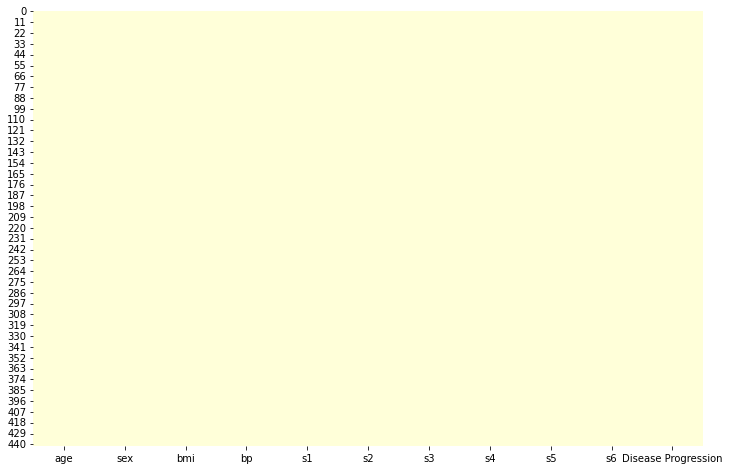

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

There are no missing values in the dataframe.

In [9]:
df.describe().round(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease Progression
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


### Checking for outliers

In [10]:
df['Disease Progression'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Disease Progression, dtype: float64

The huge difference between the mean and max value as well as high std value shows the presence of outliers.

In [11]:
q = df['Disease Progression'].quantile(0.95)
df = df[df['Disease Progression'] < q]

In [12]:
df['Disease Progression'].describe()

count    419.000000
mean     143.606205
std       69.661897
min       25.000000
25%       84.500000
50%      134.000000
75%      198.500000
max      281.000000
Name: Disease Progression, dtype: float64

### Correlation between the features of the dataset

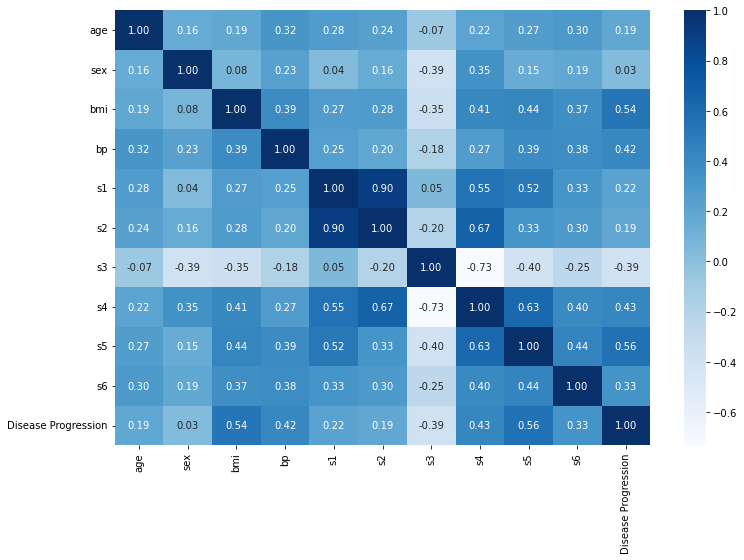

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt='.2f')
plt.show()

## Linear Regression Model

### Declare the inputs and the target

In [14]:
target = df['Disease Progression']
inputs = df.drop(['Disease Progression'], axis =1)

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

### Regression

In [16]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### Prediction on training data

In [17]:
y_hat = reg.predict(x_train)

### Plotting the predicted values and the target

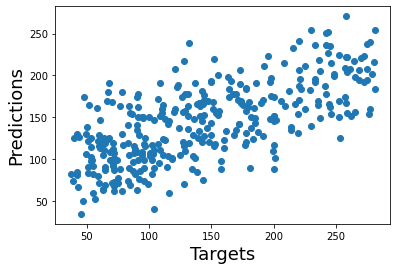

In [18]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets', size=18)
plt.ylabel('Predictions', size=18)
plt.show()

Plotting the error values. From the regression assumptions, residuals must be normally distributed with the mean of 0.

Text(0.5, 1.0, 'Residuals PDF')

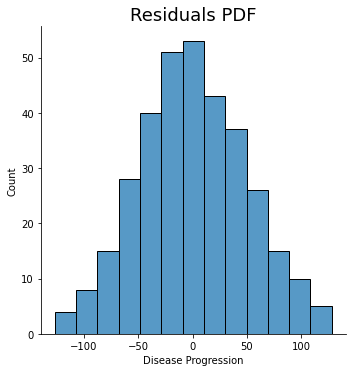

In [19]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [20]:
res = reg.score(x_train, y_train)
res_percent = res*100
result = np.round(res_percent,3)
print(f"The model explains {result}% variability of the data.")

The model explains 46.428% variability of the data.


### Finding weights and bias

In [21]:
reg.intercept_

148.14015467229962

In [22]:
reg.coef_

array([ -36.43330912, -222.44514356,  430.046946  ,  238.91938139,
       -399.92828324,  304.41475956, -175.9971871 ,  -51.07651147,
        632.88372767,   13.93406909])

In [23]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,-36.433309
1,sex,-222.445144
2,bmi,430.046946
3,bp,238.919381
4,s1,-399.928283
5,s2,304.414760
6,s3,-175.997187
7,s4,-51.076511
8,s5,632.883728
9,s6,13.934069


### Testing

In [24]:
y_hat_test = reg.predict(x_test)

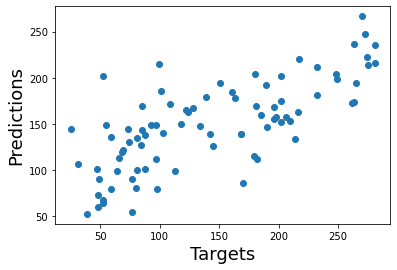

In [25]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets', size=18)
plt.ylabel('Predictions', size=18)
plt.show()

In [26]:
result = pd.DataFrame(y_hat_test, columns=['Predicted value'])
result['Target'] = y_test
result

,Predicted value,Target
0,194.448309,151.0
1,127.067606,NaN
2,85.760769,NaN
3,139.750152,NaN
4,64.428708,NaN
...,...,...
79,173.936225,113.0
80,139.600676,NaN
81,138.948780,NaN
82,175.287139,52.0


In [27]:
y_test = y_test.reset_index(drop=True)

In [28]:
result['Target'] = y_test

In [29]:
result

,Predicted value,Target
0,194.448309,151.0
1,127.067606,84.0
2,85.760769,170.0
3,139.750152,103.0
4,64.428708,52.0
...,...,...
79,173.936225,263.0
80,139.600676,168.0
81,138.948780,142.0
82,175.287139,202.0


In [30]:
result['Residual'] = result['Target'] - result['Predicted value']

In [31]:
result

,Predicted value,Target,Residual
0,194.448309,151.0,-43.448309
1,127.067606,84.0,-43.067606
2,85.760769,170.0,84.239231
3,139.750152,103.0,-36.750152
4,64.428708,52.0,-12.428708
...,...,...,...
79,173.936225,263.0,89.063775
80,139.600676,168.0,28.399324
81,138.948780,142.0,3.051220
82,175.287139,202.0,26.712861


### Evaluating the model

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_hat_test)
print(f"Mean Squared Error: {np.round(mse_test,2)}")

cod_test = r2_score(y_test, y_hat_test)
print(f"Coefficient of determination: {np.round(cod_test, 2)}")

Mean Squared Error: 2726.43
Coefficient of determination: 0.51


In [33]:
result['Difference%'] = np.absolute(result['Residual']/result['Target']*100)

In [34]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
result.sort_values(by=['Difference%'])

,Predicted value,Target,Residual,Difference%
20,202.15,202.00,-0.15,0.07
76,80.65,80.00,-0.65,0.82
71,266.56,270.00,3.44,1.27
47,220.04,217.00,-3.04,1.40
34,192.38,189.00,-3.38,1.79
81,138.95,142.00,3.05,2.15
62,169.59,181.00,11.41,6.31
73,211.59,232.00,20.41,8.80
61,177.64,163.00,-14.64,8.98
53,247.74,273.00,25.26,9.25
